In [360]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import numpy as np
import re
import itertools

In [283]:
cnn_df = pd.read_csv('data/cnn.csv')
fox_df = pd.read_csv('data/fox.csv')
onion_df = pd.read_csv('data/onion_csv.csv')

In [289]:
onion_df

,Unnamed: 0,Title,Article,Satire,CNN,Fox
0,0,https://wwwDOTtheonionDOTcom/brett-kavanaugh-r...,washington in a statement confirming his suppo...,1,0,0
1,1,https://politicsDOTtheonionDOTcom/mueller-kind...,washington irked that the attorney general’s b...,1,0,0
2,2,https://wwwDOTtheonionDOTcom/purdue-pharma-rep...,stamford ct lamenting that the numbers were mu...,1,0,0
3,3,https://wwwDOTtheonionDOTcom/conservation-prog...,nairobi kenya warning that a complete overhaul...,1,0,0
4,4,https://wwwDOTtheonionDOTcom/bin-laden-vineyar...,napa ca after being lovingly tended by generat...,1,0,0
5,5,https://localDOTtheonionDOTcom/goose-thinking-...,pineville la citing concerns over historically...,1,0,0
6,6,https://wwwDOTtheonionDOTcom/self-actualized-h...,cambridge ma warning that nothing was more dan...,1,0,0
7,7,https://localDOTtheonionDOTcom/man-entering-fo...,south bend in stumbling through the restaurant...,1,0,0
8,8,https://wwwDOTtheonionDOTcom/god-admits-heaven...,heaven speaking with obvious nostalgia regardi...,1,0,0
9,9,https://localDOTtheonionDOTcom/family-members-...,cary nc competing to secure the new pet’s alle...,1,0,0


In [130]:
client = MongoClient()
db = client.capstone
collection = db.onion1
docs = collection.find()


In [127]:
def onion_cleaner(mongo_cursor):
    '''
    input: mongo_cursor - cursor for the onion documents that 
    need cleaning
    output: dataframe with articles cleaned and stripped of characters
    Also adds Satire, CNN, and Fox columns for testing purposes
    '''
    dict_list = []
    # for loop iterates through mongo cursor and removes '_id'dict
    # it also breaks apart the dictionary into keys and values and 
    # appends to the dict_list
    for x in mongo_cursor:
        x.pop('_id')
        q = list(x.items())
        dict_list.append(q)
    # Converts the dict_list to an array
    art_arr = np.array(dict_list)
    # Gets the shape of the array so it can be reshaped
    art_shape = art_arr.shape
    # Reshapes array so it is 2D
    exp = art_arr.reshape(art_shape[0],art_shape[2])
    # Creates DF with URL and Article columns
    df = pd.DataFrame(exp, columns=['Title', 'Article'])
    # Converts Article column to list for text processing
    art = list(df['Article'])
    clean_list = []
    # Removes unwanted characters in article text and then appends
    # to clean_list
    for sample in art:
        sample1 = re.sub('<br/>', '', sample)
        sample2 = re.sub('</p>', '', sample1)
        sample3 = re.sub('—', ' ', sample2)
        sample4 = re.sub('<em>', '', sample3)
        sample5 = re.sub('</em>', '', sample4)
        sample6 = re.sub('\xa0', '', sample5)
        sample7 = re.sub('<p>', '', sample6)
        sample8 = re.sub('sic', '', sample7)
        sample9 = re.sub('[)(,.]', '', sample8)
        clean_list.append(sample9.lower())
    # Adds cleaned articles back to DF
    df['Article'] = clean_list
    # Creates dummies columns for future testing
    df['Satire'] = 1
    df['CNN'] = 0
    df['Fox']= 0
    return df

In [286]:
def cnn_cleaner(cnn_df):
    cnn_list = list(cnn_df.content)
    clean_cnn_list = []
    for article in cnn_list:
        clean_article = re.sub('CNN', '', article)
        clean_article2 = re.sub('[)(,.]', '', clean_article)
        clean_cnn_list.append(clean_article2.lower())
    clean_cnn_df = pd.DataFrame(clean_cnn_list, columns=['Article'])
    clean_cnn_df['Satire'] = 0
    clean_cnn_df['CNN'] = 1
    clean_cnn_df['Fox'] = 0
    return clean_cnn_df
        

In [287]:
def fox_cleaner(fox_df):
    fox_list = list(fox_df.content)
    clean_fox_list = []
    for article in fox_list:
        clean = re.sub('[)(,.]', '', article)
        clean_fox_list.append(clean.lower())
    clean_fox_df = pd.DataFrame(clean_fox_list, columns=['Article'])
    clean_fox_df['Satire'] = 0
    clean_fox_df['CNN'] = 0
    clean_fox_df['Fox'] = 1
    return clean_fox_df

In [288]:
fox_cleaner(fox_df)

,Article,Satire,CNN,Fox
0,more than a dozen people were hurt after mass...,0,0,1
1,republican presidential candidate ben carson’...,0,0,1
2,democratic presidential candidate martin o’ma...,0,0,1
3,a nasty battle has broken out in the republic...,0,0,1
4,donald trump launched new attacks against bil...,0,0,1
5,two munich train stations were evacuated thur...,0,0,1
6,authorities are stepping up security for new ...,0,0,1
7,in bangkok partygoers will ring in the new ...,0,0,1
8,the plunge in oil prices has given a needed b...,0,0,1
9,oil prices capped a second straight year as on...,0,0,1


In [57]:
df = onion_cleaner(docs)

In [290]:
onion_df.drop('Title', axis=1)

,Unnamed: 0,Article,Satire,CNN,Fox
0,0,washington in a statement confirming his suppo...,1,0,0
1,1,washington irked that the attorney general’s b...,1,0,0
2,2,stamford ct lamenting that the numbers were mu...,1,0,0
3,3,nairobi kenya warning that a complete overhaul...,1,0,0
4,4,napa ca after being lovingly tended by generat...,1,0,0
5,5,pineville la citing concerns over historically...,1,0,0
6,6,cambridge ma warning that nothing was more dan...,1,0,0
7,7,south bend in stumbling through the restaurant...,1,0,0
8,8,heaven speaking with obvious nostalgia regardi...,1,0,0
9,9,cary nc competing to secure the new pet’s alle...,1,0,0


In [63]:
def build_full_df(mongo_cursor, cnn_df, fox_df):
    df_onion = onion_cleaner(mongo_cursor)
    df_onion = df_onion.drop('Title', axis=1)
    df_cnn = cnn_cleaner(cnn_df)
    df_fox = fox_cleaner(fox_df)
    return df_onion, df_cnn, df_fox

In [291]:
sample_cnn_df = cnn_df[0:5000]

In [292]:
sample_fox_df = fox_df

In [298]:
sample_onion_df = onion_df[['Article', 'Satire', 'CNN', 'Fox']][0:5000]

In [449]:
list(sample_onion_df.Article)

['washington in a statement confirming his support of the recent us supreme court decision on lethal injection and the eighth amendment associate justice brett kavanaugh reiterated his belief monday that cruel and unusual punishment was “what makes someone a true kappa” “the amendments to the constitution are full of nuance and it’s time the court acknowledged that actions so often classified as ‘cruel and unusual punishment’ are actually vital in helping young guys claim their spot in the kappa brotherhood” said kavanaugh who cited his personal experience in rushing a fraternity and the vital role severe pain terror and shame played in thoroughly vetting the ideal delta kappa epsilon member “if you’re creating a frat brother from scratch you want a guy who can inflict excessive suffering in a worthless piece of shit pledge who drinks like a little bitch without subjecting a pledge to excessive pain and suffering there’s no way for the rest of the frat to know who can handle their shit

In [300]:
df_cnn = cnn_cleaner(sample_cnn_df)

In [301]:
df_fox = fox_cleaner(sample_fox_df)

In [304]:
df_final = pd.concat([sample_onion_df, df_cnn, df_fox], axis = 0, ignore_index=True)

In [305]:
df_final

,Article,Satire,CNN,Fox
0,washington in a statement confirming his suppo...,1,0,0
1,washington irked that the attorney general’s b...,1,0,0
2,stamford ct lamenting that the numbers were mu...,1,0,0
3,nairobi kenya warning that a complete overhaul...,1,0,0
4,napa ca after being lovingly tended by generat...,1,0,0
5,pineville la citing concerns over historically...,1,0,0
6,cambridge ma warning that nothing was more dan...,1,0,0
7,south bend in stumbling through the restaurant...,1,0,0
8,heaven speaking with obvious nostalgia regardi...,1,0,0
9,cary nc competing to secure the new pet’s alle...,1,0,0


In [447]:
df_final.Article[654]

'washington after brutally launching the head of the special counsel investigation into russian election interference through every marble pillar of the jefferson memorial the nefarious shadow special counsel held robert mueller by the throat at the top of the washington monument wednesday and hissed that “your investigation ends now” “you’ve followed your little trail long enough you paltry pathetic patriot” said dark mueller his viselike grip tightening on the neck of the attorney and former fbi director as he inexorably forced the special counsel’s face down toward the monument’s razor-sharp electrum-plated pyramidal tip “your time is up! the president will be exonerated! any final questions?” eyewitnesses fleeing the scene reported having no idea as to how the conflict ended as their view was obstructed when mueller countered the shadow counsel’s onslaught by launching both himself and his foul doppelganger off the top of the monument causing them to plummet the full 554 feet to th

In [346]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import MultinomialNB

In [307]:
porter = PorterStemmer()

In [308]:
def tokenize(doc):
    return [porter.stem(word) for word in word_tokenize(doc)]

In [309]:
docs_train, docs_test, y_train, y_test = train_test_split(df_final['Article'], df_final['Satire'])

In [310]:
vect = TfidfVectorizer(stop_words='english', tokenizer=tokenize)
X_train = vect.fit_transform(docs_train)
X_test = vect.transform(docs_test)


/Users/jphooster22/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_

In [444]:
vect.get_feature_names()

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'0062834266",
 "'alec",
 "'commerc",
 "'d",
 "'delici",
 "'embed",
 "'event",
 "'extern",
 "'http",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'theonion",
 "'ve",
 '*',
 '**',
 '**horde**',
 '**want',
 '*an',
 '*bold',
 '*cough*',
 '*f*ck',
 '*note',
 '*nsync',
 '*this*',
 '*winner',
 '+',
 '+++',
 '++++++++++++++++++',
 '+0',
 '+1',
 '+10',
 '+11',
 '+12',
 '+13',
 '+14',
 '+15',
 '+16',
 '+17',
 '+18',
 '+19',
 '+2',
 '+20',
 '+21',
 '+22',
 '+23',
 '+24',
 '+25',
 '+26',
 '+27',
 '+28',
 '+3',
 '+31',
 '+33',
 '+34',
 '+37',
 '+38',
 '+39',
 '+397',
 '+4',
 '+40',
 '+41',
 '+42',
 '+43',
 '+44',
 '+47',
 '+49',
 '+5',
 '+51',
 '+52',
 '+55',
 '+56',
 '+58',
 '+6',
 '+61',
 '+62',
 '+68',
 '+7',
 '+71',
 '+76',
 '+8',
 '+852',
 '+87',
 '+89',
 '+9',
 '+98',
 '-',
 '--',
 '-by-10',
 '-by-3',
 '-celebr',
 '-equip',
 '-lantern',
 '-theme',
 '//addoubleclicknet/ddm/clk/289818788',
 '//bitly/doubleshot2',
 '//bitly/vmwarepromo',
 '//febrezecom/en-us/noseb

In [384]:
matrix_voc = vect.vocabulary_

In [430]:
matrix_voc

{'palmdal': 35187,
 'ca': 9144,
 'career': 9610,
 '46-year-old': 1786,
 'star': 44575,
 'bourn': 8132,
 'film': 17843,
 'franchis': 18707,
 'actor': 3189,
 'matt': 29885,
 'damon': 13153,
 'appear': 4809,
 'fulli': 19068,
 'nude': 33771,
 'brief': 8483,
 'scene': 41317,
 'imagin': 23599,
 'area': 4971,
 'man': 29345,
 'phil': 36142,
 'pressman': 37367,
 'sourc': 44011,
 'report': 39374,
 'monday': 31527,
 '“': 52839,
 '’': 52838,
 'd': 13002,
 'onli': 34382,
 'seen': 41847,
 'bare-chest': 6283,
 'befor': 6719,
 'sudden': 45385,
 'today': 47339,
 'wa': 50384,
 'step': 44777,
 'shower': 42757,
 '”': 52840,
 'said': 40777,
 'ad': 3202,
 'eye-open': 17048,
 's': 40630,
 'nuditi': 33775,
 'perfect': 35914,
 'sens': 42057,
 'context': 11908,
 'thought': 46964,
 'second': 41772,
 'wow': 51810,
 'saw': 41215,
 'everyth': 16784,
 'certainli': 10120,
 'bold': 7852,
 'intrigu': 24344,
 'went': 51019,
 'say': 41224,
 'obvious': 34001,
 'departur': 13879,
 'oscar': 34608,
 'winner': 51474,
 'comfor

In [435]:
voc_df = pd.DataFrame.from_dict(matrix_voc, orient='index',columns=['map'])

In [439]:
sort1 = voc_df.sort_values('map')

In [445]:
sort1

,map,coef
!,0,0.731192
#,1,-1.274998
$,2,-1.255080
%,3,-1.591334
&,4,0.686948
',5,0.646070
'',6,1.055483
'0062834266,7,0.007623
'alec,8,0.063185
'commerc,9,0.007623


In [440]:
sort1['coef'] = x

In [442]:
sort2 = sort1.sort_values('coef')

In [443]:
sort2

,map,coef
”,52840,-12.399618
:,2791,-6.037154
—,52836,-5.429206
ha,21116,-4.608968
trump,48012,-3.995563
polic,36770,-3.945081
wa,50384,-3.867196
u,48434,-3.596961
s,40630,-3.395567
news,33036,-3.389302


In [397]:
voc_df['coef'] = x

In [404]:
voc_df['word']= voc_df.index

In [406]:
voc_df.reset_index(inplace=True)

In [413]:
voc_df

,index,0,coef,word
0,palmdal,35187,0.731192,palmdal
1,ca,9144,-1.274998,ca
2,career,9610,-1.255080,career
3,46-year-old,1786,-1.591334,46-year-old
4,star,44575,0.686948,star
5,bourn,8132,0.646070,bourn
6,film,17843,1.055483,film
7,franchis,18707,0.007623,franchis
8,actor,3189,0.063185,actor
9,matt,29885,0.007623,matt


In [414]:
voc_df = voc_df[[0,'coef','word']]

In [422]:
len(voc_df.coef.unique())

38972

In [428]:
sorted_voc_df = voc_df.sort_values('coef', ascending=False)

In [429]:
sorted_voc_df

,0,coef,word
52839,6249,12.191898,barbarastarrcnn
3202,11951,6.212774,conven
39375,17839,5.821802,fillet
37363,20745,5.078074,grissom
11750,10979,4.413684,clas-rock
47166,45833,4.171973,sweat-smear
25481,27857,3.920747,león
44011,8067,3.623484,boswel
50645,48685,2.903802,uncommonli
16772,28429,2.828334,long-tim


In [425]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/jphooster22/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [335]:
coef = log_reg.coef_

In [396]:
x = coef.reshape(52877,)

In [377]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [314]:
x.shape

(1, 52877)

In [315]:
log_reg.score(X_test, y_test)

0.9905266090833101

In [348]:
log_reg_y_pred = log_reg.predict(X_test)

In [349]:
log_reg_con_mat = confusion_matrix(y_test, log_reg_y_pred)
log_reg_con_mat

array([[2289,   22],
       [  12, 1266]])

In [342]:
recall_log_reg = log_reg_con_mat[1,1]/(log_reg_con_mat[1,1]+log_reg_con_mat[1,0])
recall_log_reg

0.9906103286384976

In [343]:
prec_log_reg = log_reg_con_mat[1,1]/(log_reg_con_mat[1,1]+log_reg_con_mat[0,1])
prec_log_reg

0.9829192546583851

In [345]:
F1_log_reg = ((prec_log_reg*recall_log_reg)/(prec_log_reg+recall_log_reg))*2
F1_log_reg

0.9867498051441933

In [321]:
log_reg.predict_proba(X_test)[:,1]

array([0.00448687, 0.00529841, 0.00774463, ..., 0.10250035, 0.09598626,
       0.89719364])

In [347]:
na_ba = MultinomialNB(alpha=.1)
na_ba.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [350]:
na_ba.score(X_test, y_test)

0.9339648927277793

In [351]:
na_ba_pred = na_ba.predict(X_test)

In [353]:
na_ba_con_mat = confusion_matrix(y_test, na_ba_pred)
na_ba_con_mat

array([[2267,   44],
       [ 193, 1085]])

In [354]:
recall_na_ba= na_ba_con_mat[1,1]/(na_ba_con_mat[1,1]+na_ba_con_mat[1,0])
recall_na_ba

0.848982785602504

In [355]:
prec_na_ba = na_ba_con_mat[1,1]/(na_ba_con_mat[1,1]+na_ba_con_mat[0,1])
prec_na_ba

0.9610274579273693

In [356]:
F1_na_ba = ((prec_na_ba*recall_na_ba)/(prec_na_ba+recall_na_ba))*2
F1_na_ba

0.9015371832156212

In [322]:
%matplotlib inline
import matplotlib.pyplot as plt

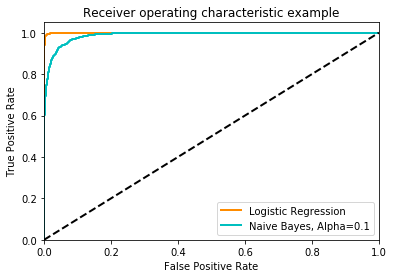

In [357]:
roc_log_reg  = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1], pos_label=1)
roc_na_ba  = roc_curve(y_test, na_ba.predict_proba(X_test)[:,1], pos_label=1)
plt.figure()
lw = 2
plt.plot(roc_log_reg[0], roc_log_reg[1], color='darkorange',
         lw=lw, label='Logistic Regression')

plt.plot(roc_na_ba[0], roc_na_ba[1], color='c',
         lw=lw, label='Naive Bayes, Alpha=0.1')
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [358]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2289   22]
 [  12 1266]]


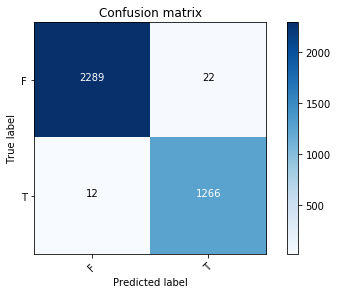

In [361]:
plot_confusion_matrix(log_reg_con_mat,['F','T'])

Confusion matrix, without normalization
[[2267   44]
 [ 193 1085]]


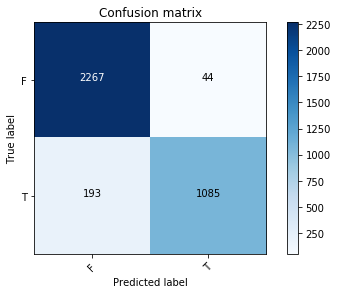

In [369]:
plot_confusion_matrix(na_ba_con_mat,['F','T'])

In [282]:
roc_log_reg

(array([0.        , 0.        , 0.        , 0.00413223, 0.00413223,
        0.00826446, 0.00826446, 0.01239669, 0.01239669, 0.02066116,
        0.02066116, 0.02479339, 0.02479339, 0.03719008, 0.03719008,
        0.04545455, 0.04545455, 0.07438017, 0.07438017, 0.0785124 ,
        0.0785124 , 1.        ]),
 array([0.        , 0.00813008, 0.70731707, 0.70731707, 0.8699187 ,
        0.8699187 , 0.91056911, 0.91056911, 0.92682927, 0.92682927,
        0.95934959, 0.95934959, 0.96747967, 0.96747967, 0.97560976,
        0.97560976, 0.98373984, 0.98373984, 0.99186992, 0.99186992,
        1.        , 1.        ]),
 array([1.8152123 , 0.8152123 , 0.55477583, 0.54706764, 0.47540383,
        0.4736316 , 0.45687679, 0.44369188, 0.43790017, 0.43316265,
        0.42752686, 0.42702037, 0.41753787, 0.39453149, 0.38964524,
        0.36124333, 0.36115653, 0.30847629, 0.30249441, 0.29996935,
        0.2975183 , 0.01663586]))

test, train split and then vectorize

Model

In [139]:
df_final

,Article,Satire,CNN,Fox
0,palo alto ca frustrated at their lack of progr...,1,0,0
1,washington after passage of a bill to block pr...,1,0,0
2,washington deciding it was time to “let the dr...,1,0,0
3,lawton ok brought to the brink of tears by the...,1,0,0
4,rockford md instinctively exerting his dominan...,1,0,0
5,hanoi vietnam tearing up as he described the c...,1,0,0
6,austin tx expressing his concern that the rela...,1,0,0
7,vatican city hoping to gain new insights into ...,1,0,0
8,washington demonstrating their findings with a...,1,0,0
9,portland or speculating that he probably shoul...,1,0,0


In [106]:
t2

' () The shooting Friday at Fort   International Airport may test the bounds of something that is entirely legal and commonplace in the United States: Flying with a gun and ammunition. The incident highlights the peculiarities and seeming contradictions of local, state and federal gun laws inside the nation’s airports: It is legal for a passenger to travel with a firearm and ammunition in checked baggage, but inside baggage claim or at a ticketing counter, that person might otherwise be breaking the law if the weapon is out in the open or carried on their person. Five people were shot dead and eight wounded in a baggage claim area at Florida’s   airport, and law enforcement sources tell  the suspect had legally brought the firearm and ammunition in his checked baggage while flying from Anchorage to Fort Lauderdale. When he reached his destination, the suspect went to baggage claim, got his baggage, took out the gun and began firing, sources told .  Airport officials say that Friday’s i

In [107]:
t3 = re.sub('[)(,.]', '', t2)

In [108]:
t3

'  The shooting Friday at Fort   International Airport may test the bounds of something that is entirely legal and commonplace in the United States: Flying with a gun and ammunition The incident highlights the peculiarities and seeming contradictions of local state and federal gun laws inside the nation’s airports: It is legal for a passenger to travel with a firearm and ammunition in checked baggage but inside baggage claim or at a ticketing counter that person might otherwise be breaking the law if the weapon is out in the open or carried on their person Five people were shot dead and eight wounded in a baggage claim area at Florida’s   airport and law enforcement sources tell  the suspect had legally brought the firearm and ammunition in his checked baggage while flying from Anchorage to Fort Lauderdale When he reached his destination the suspect went to baggage claim got his baggage took out the gun and began firing sources told   Airport officials say that Friday’s incident could 

In [ ]:
def fox_word_count(content_list):
    '''
    Takes in a list of fox articles that is a list of strings
    and then returns an average word count for each article.
    input: list of strings
    output: average word count per article
    '''
    
    count = 0
    words = 0
    
    
    # Come back for more preprocessing
    # Right now this is just a rough estimate
    # because the numbers in the articles are messing up
    # the count
    # (), "" are also messing up the count
    for x in content_list:
        length = len(x.split()) 
        words += length
        count += 1
    print(count)
    print(words)
    return words/count

In [324]:
def word_count(content_list):
    '''
    Takes in a list of fox articles that is a list of strings
    and then returns an average word count for each article.
    input: list of strings
    output: average word count per article
    '''
    
    count = 0
    words = 0
    
    
    # Come back for more preprocessing
    # Right now this is just a rough estimate
    # because the numbers in the articles are messing up
    # the count
    # (), "" are also messing up the count
    for x in content_list:
        length = len(x.split()) 
        words += length
        count += 1
    print(count)
    print(words)
    return words/count

In [326]:
list_onion_articles = list(sample_onion_df.Article)

In [327]:
word_count(list_onion_articles)

5000
913827


182.7654

In [ ]:
def cnn_word_count(content_list):
    '''
    Takes in content of all cnn articles as a list. 
    Then removes the '(CNN)' that is at the beginning of every
    article and gets a word count. 
    input: list of strings  
    output: float - average number of words per article
    '''
    count = 0
    words = 0
    # Come back for more preprocessing
    # Right now this is just a rough estimate
    # because the numbers in the articles are messing up
    # the count
    # (), "" are also messing up the count
    for article in content_list:
        split_article = article.split()
        for word in split_article:
            if word == '(CNN)':
                split_article.remove(word)
        length = len(split_article) 
        words += length
        count += 1
    print(count)
    print(words)
    return words/count